# Projeto 1 "Online Retail"

Dataset disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

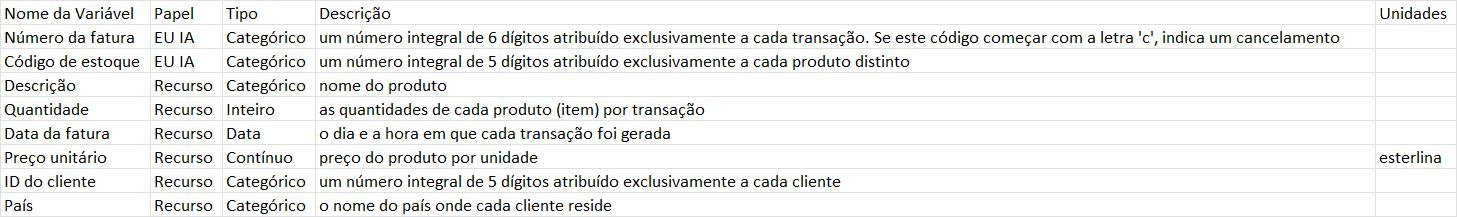

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import time

In [2]:
#Importação de dados

start_1 = time.time()
df = pd.read_excel('Online+Retail.xlsx')
end_1 = time.time()
print("A execução 1 demorou: ", end_1 - start_1)   

A execução 1 demorou:  54.61831569671631


In [3]:
#Criação do SalesTotal
df['SalesTotals'] = round(df['Quantity']*df['UnitPrice'],1)

In [4]:
df = df.copy()

# Criando a coluna 'MonthYear' corretamente no formato YYYY-MM
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Mantendo 'Year' como número inteiro
df['Year'] = df['InvoiceDate'].dt.year

# Mantendo 'Month' como número inteiro
df['Month'] = df['InvoiceDate'].dt.month

# Visualizando os tipos de dados para conferir
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
SalesTotals           float64
MonthYear              object
Year                    int64
Month                   int64
dtype: object

In [5]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals,MonthYear,Year,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.2,2011-12,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.6,2011-12,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.6,2011-12,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.6,2011-12,2011,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.8,2011-12,2011,12


In [6]:
#DataSet Filtrando 'c' Cancelados
df_cancelados = df[df['InvoiceNo'].str.startswith('C', na=False)]
print('Total de Cancelamentos: ',len(df_cancelados))

#DataSet Filtrado Cancelados
df = df[~df['InvoiceNo'].isin(df_cancelados['InvoiceNo'])]
print('Total de Vendas Sem cancelamentos: ',len(df))
print('Percentual de Cancelamento: ', round(len(df_cancelados)/len(df),2),'%')

Total de Cancelamentos:  9288
Total de Vendas Sem cancelamentos:  532621
Percentual de Cancelamento:  0.02 %


In [51]:
#Removendo Quantity Negativo
df = df.copy()
df_q_negativo = df[df['Quantity']<0]


df = df[~df['Quantity'].isin(df_q_negativo['Quantity'])]

df['Quantity'].min()

1

In [8]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.001
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID     0.335
Country        0.000
SalesTotals    0.000
MonthYear      0.000
Year           0.000
Month          0.000
dtype: float64

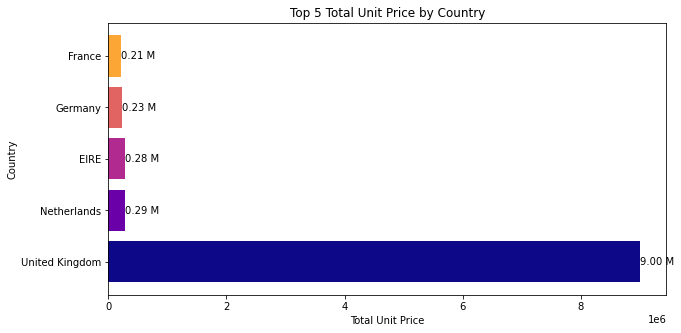

In [9]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['SalesTotals'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo

# Config
plt.xlabel('Total Unit Price')
plt.ylabel('Country')
plt.title('Top 5 Total Unit Price by Country')


plt.show()


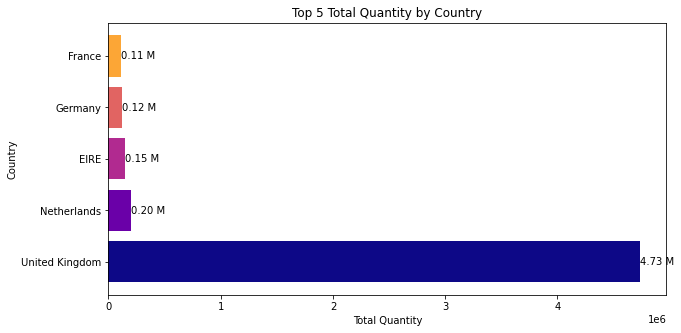

In [10]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['Quantity'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo
    
# Config
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.title('Top 5 Total Quantity by Country')


plt.show()

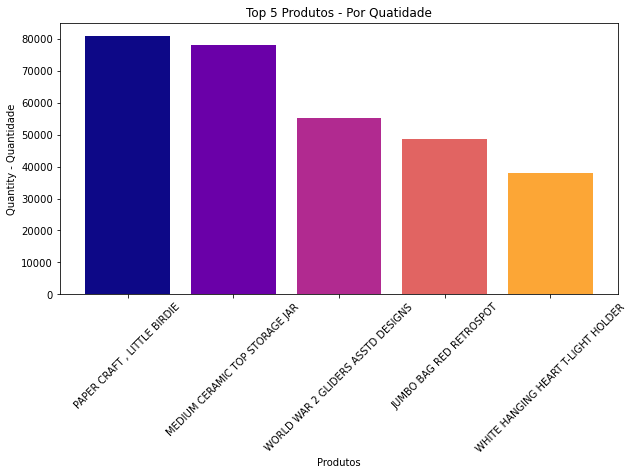

In [11]:
#Top 5 Produtos
plt.figure(figsize=(10, 5))
plt.bar(
    df.groupby('Description')['Quantity'].sum().nlargest(5).index,
    df.groupby('Description')['Quantity'].sum().nlargest(5).values,
    color=[plt.cm.plasma(i / 5) for i in range(5)],
    
   
)
# Config

plt.ylabel('Quantity - Quantidade')
plt.title('Top 5 Produtos - Por Quatidade')
plt.xlabel('Produtos')
plt.xticks(rotation=45)

plt.show()

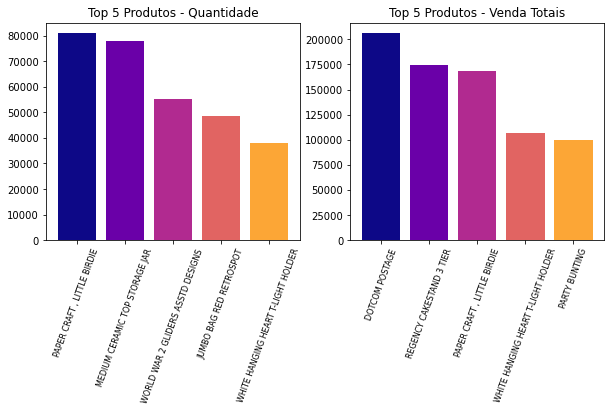

In [12]:
#Top 5 Produtos - Quantidades e Vendas

top_proucts_quantity = df.groupby('Description')['Quantity'].sum().nlargest(5)
label_quantity =  top_proucts_quantity.index
values_quantity = top_proucts_quantity.values

top_proucts_SalesTotals = df.groupby('Description')['SalesTotals'].sum().nlargest(5)
label_SalesTotals =  top_proucts_SalesTotals.index
values_SalesTotals = top_proucts_SalesTotals.values


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))

#### Grafico 1
ax1.bar(label_quantity, values_quantity, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks

ax1.set_title('Top 5 Produtos - Quantidade')
ax1.set_xticks(range(len(label_quantity)))
ax1.set_xticklabels(label_quantity, rotation=70, fontsize=8); 

#### Grafico 2

ax2.bar(label_SalesTotals, values_SalesTotals, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks

ax2.set_title('Top 5 Produtos - Venda Totais')
ax2.set_xticks(range(len(label_SalesTotals))) 
ax2.set_xticklabels(label_SalesTotals, rotation=70,fontsize=8);

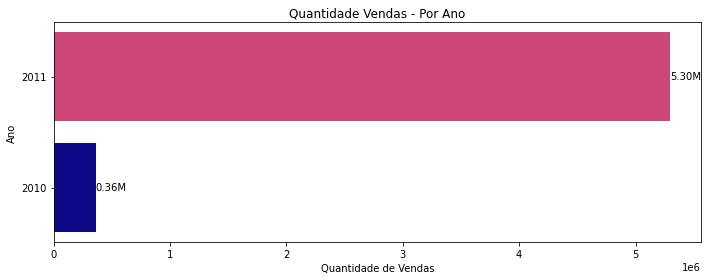

In [13]:
# Agrupar e somar as quantidades por ano
quantity_year = df.groupby('Year')['Quantity'].sum()

# Obter os rótulos e valores
label_quantity_year = quantity_year.index.tolist()  # Converte o índice para uma lista
values_quantity_year = quantity_year.values

# Criar a figura e o eixo
fig, ax3 = plt.subplots(1, 1, figsize=(10, 4))

# Gráfico de barras horizontais
bars = ax3.barh(label_quantity_year, values_quantity_year, color=[plt.cm.plasma(i / 2) for i in range(len(label_quantity_year))])

# Adicionar rótulos de valores nas barras
for bar in bars:
    xval = bar.get_width()  # Comprimento da barra (quantidade)
    label = xval / 1_000_000
    ax3.text(xval, bar.get_y() + bar.get_height()/2, f'{label:.2f}M', va='center')  # Adiciona duas casas decimais

# Definir título e rótulos dos eixos
ax3.set_title('Quantidade Vendas - Por Ano')
ax3.set_xlabel('Quantidade de Vendas')
ax3.set_ylabel('Ano')

# Definir os ticks do eixo Y para mostrar apenas os anos desejados
ax3.set_yticks([2010, 2011])  # Apenas 2010 e 2011
ax3.set_yticklabels([str(year) for year in label_quantity_year], fontsize=10)  # Rotular os anos

plt.tight_layout()
plt.savefig('nome_do_arquivo.png')
plt.show()


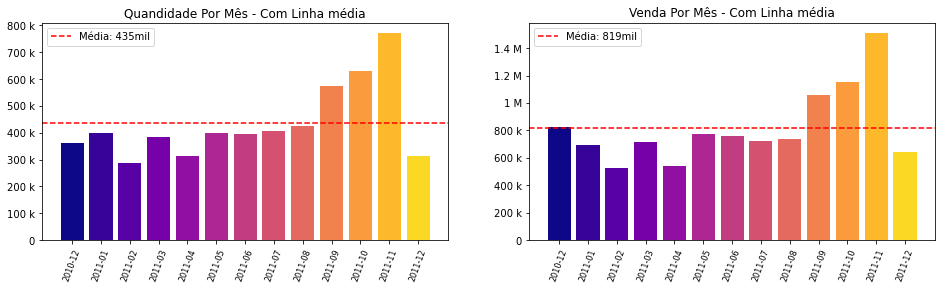

In [14]:
##### Grafico 5

quantity_month = df.groupby(['MonthYear'])['Quantity'].sum()

quantity_month_label = quantity_month.index
quantity_month_values = quantity_month.values

fig, (ax5,ax6) = plt.subplots(1,2,figsize=(16,4))

#Formatação da Barra
ax5.bar(quantity_month_label, quantity_month_values,
    color=[plt.cm.plasma(i /len(quantity_month_label)) for i in range(len(quantity_month_label))],
       width=0.8)

ax5.tick_params(axis='x', rotation=70, labelsize=8) #Formatação Com tick_Params

ax5.axhline(quantity_month_values.mean(), 
            color='red', 
            linestyle='--', 
            label=f'Média: {(quantity_month_values.mean()) /1000:.0f}mil')  #Linha Media axhline

ax5.yaxis.set_major_formatter(mtick.EngFormatter()) # Ajuste ticker Y

ax5.legend() #Legeda da Linha media


ax5.tick_params(axis='x', rotation=70, labelsize=8) #Rotação do Stick(Label)

ax5.set_title("Quandidade Por Mês - Com Linha média") #titulo

###### Grafico 6

sales_month = df.groupby(['MonthYear'])['SalesTotals'].sum()

sales_month_label = sales_month.index
sales_month_values = sales_month.values

#Formatação da Barra
ax6.bar(sales_month_label, sales_month_values,
    color=[plt.cm.plasma(i /len(sales_month_values)) for i in range(len(sales_month_values))],
       width=0.8)

ax6.tick_params(axis='x', rotation=70, labelsize=8) #Formatação Com tick_Params



ax6.axhline(sales_month_values.mean(), 
            color='red', 
            linestyle='--', 
            label=f'Média: {(sales_month_values.mean()) /1000:.0f}mil')  #Linha Media axhline

ax6.yaxis.set_major_formatter(mtick.EngFormatter()) # Ajuste ticker Y


ax6.legend() #Legeda da Linha media


ax6.tick_params(axis='x', rotation=70, labelsize=8) #Rotação do Stick(Label)

ax6.set_title("Venda Por Mês - Com Linha média") #titulo

plt.show()

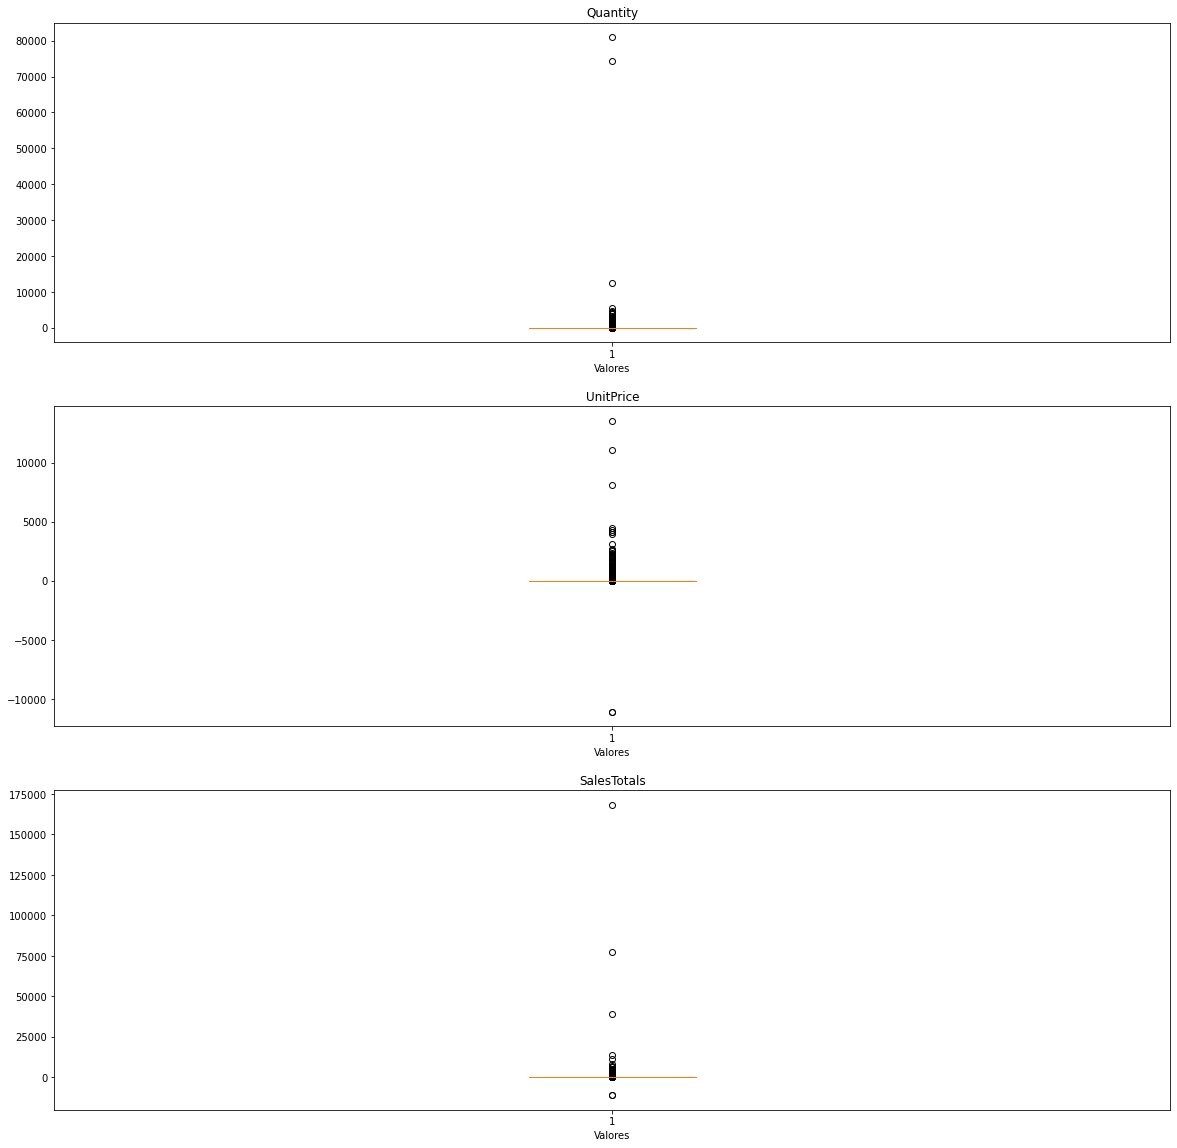

In [15]:
#BOX PLOT

colunas_numericas = df[['Quantity','UnitPrice','SalesTotals']].columns


plt.figure(figsize=(20,20))

for i,column  in enumerate(colunas_numericas):
    plt.subplot(len(colunas_numericas),1,i+1)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel('Valores')

#plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Mostra os gráficos
    

In [16]:
corr_matrix = df[['Quantity','UnitPrice','SalesTotals']].corr()

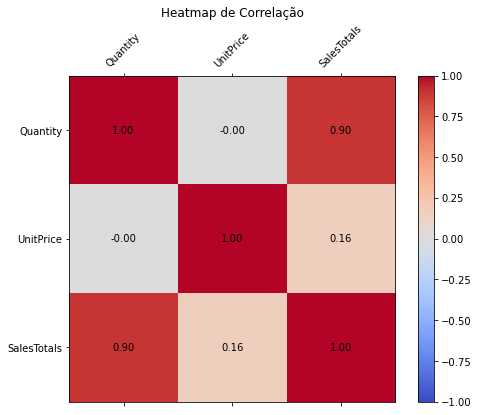

In [17]:
fig, ax7 = plt.subplots(figsize=(8,6))

coax = ax7.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(coax)

# Definindo os rótulos dos eixos
ax7.set_xticks(np.arange(len(corr_matrix.columns)))
ax7.set_yticks(np.arange(len(corr_matrix.columns)))
ax7.set_xticklabels(corr_matrix.columns)
ax7.set_yticklabels(corr_matrix.columns)

plt.xticks(rotation=45)

# Adicionando os valores numéricos dentro das células
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax7.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
        

        # Definindo o título do gráfico
plt.title('Heatmap de Correlação')

# Exibindo o gráfico
plt.show()


In [42]:
df_out_quant = df['Quantity'].quantile(0.99999)
df_out_quant

4206.147999991663

In [44]:
df.sort_values(by='Quantity', ascending=False).head(40000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals,MonthYear,Year,Month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,2011-12,2011,12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01,2011,1
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0,2011-11,2011,11
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,0.0,2011-01,2011,1
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0,2011-10,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...
153469,549746,22699,ROSES REGENCY TEACUP AND SAUCER,24,2011-04-12 10:38:00,2.55,15251.0,United Kingdom,61.2,2011-04,2011,4
153470,549746,22697,GREEN REGENCY TEACUP AND SAUCER,24,2011-04-12 10:38:00,2.55,15251.0,United Kingdom,61.2,2011-04,2011,4
70448,542058,84674,FLYING PIG WATERING CAN,24,2011-01-25 11:59:00,1.25,15601.0,United Kingdom,30.0,2011-01,2011,1
153475,549746,22721,SET OF 3 CAKE TINS SKETCHBOOK,24,2011-04-12 10:38:00,4.25,15251.0,United Kingdom,102.0,2011-04,2011,4


In [62]:
# Calculando o primeiro e o terceiro quartil
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Calculando o IQR
IQR = Q3 - Q1

# Definindo os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(' O limite inferior é de:',limite_inferior,"\n",
      'O limite inferior é de:',limite_superior)

 O limite inferior é de: -12.5 
 O limite inferior é de: 23.5
